# Is There a Correlation Between the Descriptive Metrics of Songs Provided by Spotify and Song Popularity on Various Platforms?

SYSC4906 Project<br>by Nayeeb Mowla, 101042742

## 1.0 Overview: 
***
###  1.1 Analyzing Twitter "Engagement" of Songs Against Spotify Metrics
The application Spotify contains a wide range of songs, intended to fit any user’s music taste and preferred genre. To determine whether the future popularity of these songs can be predicted based on their inherent characteristics, correlations must be investigated between a known set of song metrics and song popularity at various times on several platforms.

Songs from the chosen Spotify dataset (https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) are described using the following metrics:

Numerical:

    - acousticness (Ranges from 0 to 1)
    - danceability (Ranges from 0 to 1)
    - energy (Ranges from 0 to 1)
    - duration_ms (Integer typically ranging from 200k to 300k)
    - instrumentalness (Ranges from 0 to 1)
    - valence (Ranges from 0 to 1)
    - popularity (Ranges from 0 to 100)
    - tempo (Float typically ranging from 50 to 150)
    - liveness (Ranges from 0 to 1)
    - loudness (Float typically ranging from -60 to 0)
    - speechiness (Ranges from 0 to 1)
    - year (Ranges from 1921 to 2020)

Dummy:

    - mode (0 = Minor, 1 = Major)
    - explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

    - key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
    - artists (List of artists mentioned)
    - release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - name (Name of the song)
***

What kinds of correlations exist between a song's Twitter "engagement" and its Spotify metrics?<br>What Spotify musical factor was maximized amongst the songs which create the most discussion/"engagement" on Twitter?<br><br>This analysis will measure the engagement of a song on Twitter by the amount of Tweets that song, as well as the total number of likes, quotes, replies, and retweets those tweets get. This analysis will only consider recent songs (from the past 5 year) due limitations of the Twitter API. This analysis will not consider bots or fake accounts on Twitter and the possible skew they can have on data. This analysis will also not consider the bias of songs being referred to differently on Twitter other than by the names given by the Spotify dataset. The results from this analysis can provide insight for artists and content creators into the type of songs they should create. Artists may use the results to better target their goals for their songs and content.

## 2.0 Gathering and Preparing the Data
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2.1 Spotify

In [2]:
# Creating a dataframe using the chosen Spotify data
spotify_data = pd.read_csv('data.csv')
spotify_df = pd.DataFrame(spotify_data, columns=["name","artists","year","popularity","acousticness",\
    "danceability","energy","duration_ms","instrumentalness","valence","tempo","liveness","loudness","speechiness"])
spotify_df

,name,artists,year,popularity,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,Keep A Song In Your Soul,['Mamie Smith'],1920,12,0.991000,0.598,0.224,168333,0.000522,0.6340,149.976,0.3790,-12.628,0.0936
1,I Put A Spell On You,"[""Screamin' Jay Hawkins""]",1920,7,0.643000,0.852,0.517,150200,0.026400,0.9500,86.889,0.0809,-7.261,0.0534
2,Golfing Papa,['Mamie Smith'],1920,4,0.993000,0.647,0.186,163827,0.000018,0.6890,97.600,0.5190,-12.098,0.1740
3,True House Music - Xavier Santos & Carlos Gomi...,['Oscar Velazquez'],1920,17,0.000173,0.730,0.798,422087,0.801000,0.0422,127.997,0.1280,-7.311,0.0425
4,Xuniverxe,['Mixe'],1920,2,0.295000,0.704,0.707,165224,0.000246,0.2990,122.076,0.4020,-6.036,0.0768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,The One,"['DJ Combo', 'Sander-7', 'Tony T']",2020,0,0.009170,0.792,0.866,147615,0.000060,0.1860,125.972,0.1780,-5.089,0.0356
174385,A Little More,['Alessia Cara'],2021,0,0.795000,0.429,0.211,144720,0.000000,0.2280,94.710,0.1960,-11.665,0.0360
174386,Together,['Roger Fly'],2020,0,0.806000,0.671,0.589,218147,0.920000,0.7140,108.058,0.1130,-12.393,0.0282
174387,champagne problems,['Taylor Swift'],2021,69,0.920000,0.462,0.240,244000,0.000000,0.3200,171.319,0.1130,-12.077,0.0377


### 2.1.1 Cleaning the Spotify Data

In [3]:
# Clean the data to remove duplicates where entries have the same song name
spotify_df = spotify_df.drop_duplicates(subset=['name'])

# Limit the dataframe to only include songs in the past 5 years due to Twitter API's query limitations
# Twitter's search API only returns tweets from the past 7 days, so songs from recent years will be used
# This will likely introduce some bias however
spotify_df = spotify_df.loc[spotify_df['year'] >= 2016]

# Remove song names with non-ASCII characters to help during twitter query
spotify_df = spotify_df[spotify_df['name'].map(lambda x: x.isascii())]
spotify_df.reset_index(drop=True, inplace=True)
spotify_df

,name,artists,year,popularity,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],2018,27,0.887000,0.319,0.2010,187333,0.000000,0.2390,117.153,0.9040,-17.796,0.0623
1,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],2018,26,0.938000,0.269,0.1290,236800,0.000005,0.1600,82.332,0.6830,-18.168,0.0576
2,"The Circle Game - Live at The 2nd Fret, Philad...",['Joni Mitchell'],2020,19,0.881000,0.644,0.2120,313093,0.000022,0.4410,117.072,0.7980,-14.118,0.0347
3,"Urge For Going - Live at The 2nd Fret, Philade...",['Joni Mitchell'],2020,19,0.955000,0.627,0.1840,295093,0.000162,0.2990,115.864,0.0986,-15.533,0.0450
4,What's The Story Mr. Blue - Live at The 2nd Fr...,['Joni Mitchell'],2020,19,0.888000,0.581,0.3310,183440,0.000015,0.6420,88.303,0.1470,-14.087,0.2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,Precious' Tale,['Jazmine Sullivan'],2021,59,0.715000,0.734,0.3460,43320,0.000000,0.9300,88.849,0.3940,-11.722,0.3550
10805,So Fine - TC Remix,['Sean Paul'],2021,0,0.000032,0.530,0.9590,292427,0.027300,0.2620,173.009,0.3550,-5.648,0.1440
10806,Little Boy,['Ashnikko'],2021,61,0.105000,0.781,0.4870,172720,0.000000,0.3270,129.941,0.0802,-7.301,0.1670
10807,I giorni,"['Ludovico Einaudi', 'Johannes Bornlöf']",2021,0,0.976000,0.358,0.1210,381150,0.889000,0.1060,131.808,0.1350,-25.111,0.0532


The median popularity is: 13.0


count    10809.000000
mean        28.869923
std         31.654762
min          0.000000
25%          0.000000
50%         13.000000
75%         66.000000
max        100.000000
Name: popularity, dtype: float64

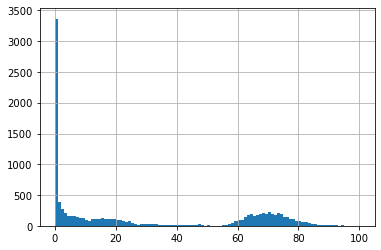

In [4]:
# Check the "popularity" distribution
x = spotify_df["popularity"]
x.hist(histtype = 'stepfilled', bins = 100)
print(f"The median popularity is: {spotify_df['popularity'].median()}")
x.describe()

The median popularity is: 70.0


count    3774.000000
mean       70.260466
std         7.166509
min        50.000000
25%        65.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: popularity, dtype: float64

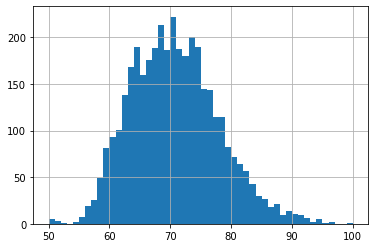

In [5]:
# A lot of songs with low popularity, most songs have close to 0 popularity
# We will only take the most popular songs to compare against Tweets
# --> Songs with over 50 popularity
# These songs will likely have engagement on Twitter

# Drop unpopular songs
indexNames = spotify_df[spotify_df['popularity'] < 50].index
spotify_df = spotify_df.drop(indexNames)
spotify_df.reset_index(drop=True, inplace=True)

# Check the "popularity" distribution
x = spotify_df["popularity"]
x.hist(histtype = 'stepfilled', bins = 50)
print(f"The median popularity is: {spotify_df['popularity'].median()}")
x.describe()

## 2.2 Twitter API

This analysis uses the Twitter Standard API v2 (https://developer.twitter.com/en/docs/twitter-api/early-access)
When searching Tweets the API limits searches to the past 7 days for Standard users (https://developer.twitter.com/en/docs/twitter-api/tweets/search/introduction).
The API also limits the rate of requests to 450 requests per 15 mins for Standard users (https://developer.twitter.com/en/docs/twitter-api/rate-limits).

To collect the Twitter data, the sample of songs will have to be split into 450 row segments so we can make a search request for each song. Every 15 mins we will run queries on another segment of 450 songs until all the data is collected.

### 2.2.1 Collecting Twitter Search Data

In [6]:
import requests
import json
import urllib
import time

In [7]:
# Get Twitter API keys
%run ./Keys.ipynb

In [8]:
# Define our own function to make Twitter API calls for searching tweets

# define search twitter function
def search_twitter(query, tweet_fields, max_results, bearer_token = BEARER_TOKEN):    
    
    headers = {"Authorization": "Bearer {}".format(bearer_token)}

    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}&{}".format(query, tweet_fields, max_results)
    
    response = requests.request("GET", url, headers=headers)

    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [9]:
# define function to collect tweets given all the song names from a data set
# and return lists of the total tweets, likes, quotes, replies, and retweets --> the "engagement"
def collect_tweets(song_names):
    
    # The dataframe columns to be created
    total_tweets = []
    likes = []
    quotes = []
    replies = []
    retweets = []
    
    # For every song given, make a search request
    for song_name in song_names:
        num_tweets = 0
        like_count = 0
        quote_count = 0
        reply_count = 0
        retweet_count = 0

        #search term, quotations in the query mean search for EXACT the given string
        query = f'"{song_name}"'
        query = urllib.parse.quote_plus(query)
        #twitter fields to be returned by api call
        tweet_fields = "tweet.fields=public_metrics"
        #return maximum of 100 tweets (Twitter API's limit)
        max_results = "max_results=100"

        #twitter api call
        try:
            json_response = search_twitter(query=query, tweet_fields=tweet_fields, max_results=max_results, bearer_token=BEARER_TOKEN)
            tweets = json_response.get("data")
            #print(json.dumps(tweets, indent=4, sort_keys=True))
            num_tweets = len(tweets)
            for tweet in tweets:
                like_count += int(tweet.get("public_metrics").get("like_count"))
                quote_count += int(tweet.get("public_metrics").get("quote_count"))
                reply_count += int(tweet.get("public_metrics").get("reply_count"))
                retweet_count += int(tweet.get("public_metrics").get("retweet_count"))
            
            # Append to the columns
            total_tweets.append(num_tweets)
            likes.append(like_count)
            quotes.append(quote_count)
            replies.append(reply_count)
            retweets.append(retweet_count)
        except Exception as e:
            print(f"Failed to query {song_name}: {e}")
    
#     print(total_tweets)
#     print(likes)
#     print(quotes)
#     print(replies)
#     print(retweets)
    return total_tweets, likes, quotes, replies, retweets

In [10]:
# Take a random sample of 2250 since Twitter API cannot handle too many requests
# Twitter API rate limit = 450 requests allowed every 15 mins
# 1 search request per songs
# 450 x 5 = 2250
sample_df = spotify_df.sample(n = 2250)
sample_df.reset_index(drop=True, inplace=True)
# split into 5 dataframes of 450 songs
df_splits = np.array_split(sample_df, 5)

In [11]:
# Collect Twitter Data on each of the 5 dataframes
# Every 15 mins perform another 450 search requests
for df in df_splits:
    song_names = df["name"].tolist()
    # Sleep for 15 mins + 10 extra seconds just incase
    time.sleep(910)
    total_tweets, likes, quotes, replies, retweets = collect_tweets(song_names)
    tweets_df = pd.DataFrame(list(zip(song_names, total_tweets, likes, quotes, replies, retweets)), columns=["Name","Tweets","Likes","Quotes","Replies","Retweets"])
    # Add to csv file so the data isn't lost incase of crash
    with open("TwitterData.csv", 'a') as f:
        tweets_df.to_csv(f, header=f.tell()==0)
        
# Prints songs which couldn't be queried / returned nothing, these songs were dropped

Failed to query All the Way (I Believe In Steve): object of type 'NoneType' has no len()
Failed to query Flatliner (feat. Dierks Bentley): object of type 'NoneType' has no len()
Failed to query When You Down (with Polo G feat. Lil Durk): object of type 'NoneType' has no len()
Failed to query Cravin (feat. G-Eazy): object of type 'NoneType' has no len()
Failed to query Now I'm Up To My Neck With Offers: object of type 'NoneType' has no len()
Failed to query Dreams - 2018 Remaster: object of type 'NoneType' has no len()
Failed to query Tulou Tagaloa: object of type 'NoneType' has no len()
Failed to query Off White VLONE (Lil Baby & Gunna feat. Lil Durk & NAV): object of type 'NoneType' has no len()
Failed to query Dive - Recorded At Sound Stage Nashville: object of type 'NoneType' has no len()
Failed to query Boys Like You - Acoustic: object of type 'NoneType' has no len()
Failed to query X (feat. Maluma & Ozuna) - Remix: object of type 'NoneType' has no len()
Failed to query Deep Sleep 

Failed to query What's Up Danger (with Black Caviar): object of type 'NoneType' has no len()
Failed to query Baby Dreams PT 2: object of type 'NoneType' has no len()
Failed to query Thunderstorm By The Waterfall: object of type 'NoneType' has no len()
Failed to query All I Want - From "High School Musical: The Musical: The Series": (400, '{"errors":[{"parameters":{"query":["\\"All I Want - From \\"High School Musical: The Musical: The Series\\"\\""]},"message":"There were errors processing your request: Reference to invalid field \'Musical\' (at position 46), Reference to invalid operator \'Musical\'. Operator is not available in current product or product packaging. Please refer to complete available operator list at http://t.co/operators. (at position 33), Reference to invalid operator \'Musical\'. Operator is not available in current product or product packaging. Please refer to complete available operator list at http://t.co/operators. (at position 46), Phrases cannot be empty (at 

In [12]:
# Create a dataframe from the collected data
twitter_df = pd.read_csv('TwitterData.csv')
twitter_df = pd.DataFrame(twitter_df, columns=["Name","Tweets","Likes","Quotes","Replies","Retweets"])
twitter_df

# Some songs were dropped because they couldn't be queried / returned nothing
# --> Fewer rows than original 2250 sample

,Name,Tweets,Likes,Quotes,Replies,Retweets
0,I'm Still,100,7,0,2,6146
1,Happiest Year,99,62,1,24,619
2,HEARTBREAK ANNIVERSARY,100,12,1,7,70961
3,Real Baby Pluto,73,27,3,10,5669
4,Havin My Way (feat. Lil Durk),10,1,0,2,0
...,...,...,...,...,...,...
2137,Start a Riot,8,1,0,2,0
2138,Blessings (feat. Jamila Woods),100,153,1,19,11990
2139,Good Thing (with Kehlani),100,131,1,22,130
2140,Heartless (with Julia Michaels & Morgan Wallen),100,54,0,22,1373


## 3.0 Analysis of the Results
***

In [13]:
# Merge the data with the Spotify data of the same song names
merged = spotify_df.merge(twitter_df, left_on=['name'], right_on=['Name'], how="right")
# Drop extra "Name" column
merged = merged.drop(columns=["Name"])
merged

,name,artists,year,popularity,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness,Tweets,Likes,Quotes,Replies,Retweets
0,I'm Still,['Juice WRLD'],2018,74,0.08110,0.631,0.672,192859,0.000000,0.282,119.948,0.1540,-4.583,0.0347,100,7,0,2,6146
1,Happiest Year,['Jaymes Young'],2019,82,0.88500,0.501,0.167,228443,0.000000,0.356,112.275,0.1110,-14.061,0.0484,99,62,1,24,619
2,HEARTBREAK ANNIVERSARY,['Giveon'],2020,77,0.52700,0.451,0.462,198371,0.000000,0.533,89.174,0.3030,-8.962,0.0782,100,12,1,7,70961
3,Real Baby Pluto,"['Future', 'Lil Uzi Vert']",2020,66,0.01650,0.898,0.567,196636,0.000000,0.602,141.973,0.1090,-6.446,0.3020,73,27,3,10,5669
4,Havin My Way (feat. Lil Durk),"['Lil Skies', 'Lil Durk']",2020,72,0.27500,0.802,0.737,211654,0.000000,0.712,127.013,0.1130,-4.862,0.0757,10,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,Start a Riot,"['Duckwrth', 'Shaboozey']",2018,68,0.01280,0.728,0.727,171467,0.000000,0.890,143.144,0.0882,-3.585,0.2060,8,1,0,2,0
2138,Blessings (feat. Jamila Woods),"['Chance the Rapper', 'Jamila Woods']",2016,57,0.72300,0.714,0.343,221940,0.000005,0.372,72.348,0.1020,-7.641,0.3800,100,153,1,19,11990
2139,Good Thing (with Kehlani),"['Zedd', 'Kehlani']",2019,73,0.39900,0.693,0.564,210901,0.000000,0.574,185.913,0.0409,-3.857,0.0378,100,131,1,22,130
2140,Heartless (with Julia Michaels & Morgan Wallen),"['Diplo', 'Julia Michaels', 'Morgan Wallen']",2020,71,0.21200,0.648,0.553,172973,0.000000,0.275,110.949,0.0728,-6.350,0.0409,100,54,0,22,1373


<AxesSubplot:>

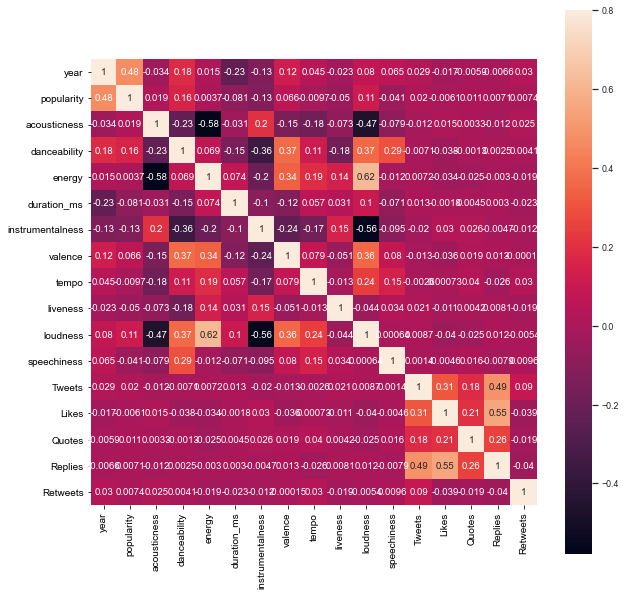

In [14]:
# Calculate the correlation between the Twitter engagement and the Spotify metrics
fig, ax = plt.subplots(figsize=(10,10))
corrmat = merged.corr()
sns.set(font_scale=0.8)
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)

<Figure size 864x216 with 0 Axes>

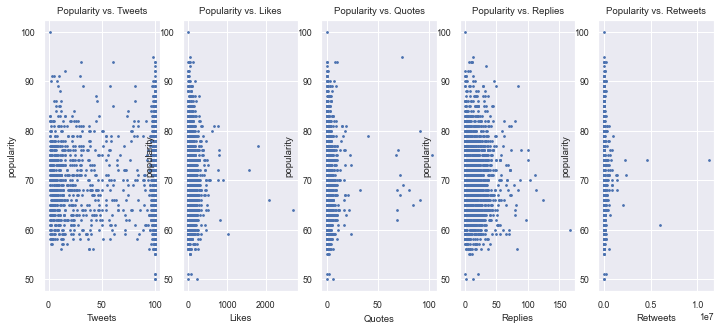

In [15]:
# Plot the Popularity vs. Twitter metrics of the songs to see if there are any trends
features = ['Tweets', 'Likes', 'Quotes', 'Replies', 'Retweets']
target = merged['popularity']

fig = plt.gcf()

fig.set_size_inches((12,3))

plt.figure(figsize=(12, 5))

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = merged[col]
    y = target
    plt.scatter(x, y, marker='o', s = 3)
    plt.title(f"Popularity vs. {col}")
    plt.xlabel(col)
    plt.ylabel('popularity')

## 4.0 Conclusion
***
In conclusion, there unfortunately does not seem to be significant correlation between the "engagement" of songs on Twitter and any of Spotify's metrics.